# Quickstart

In [13]:
import pytometry as pm
import readfcs
import anndata
from matplotlib import rcParams

Read fcs file example from the `readfcs` package. The fcs file was part of the following [reference](https://insight.jci.org/articles/view/124928) and originally deposited on the [FlowRepository](http://flowrepository.org/id/FR-FCM-ZYQ9).

In [2]:
path_data = readfcs.datasets.Oetjen18_t1()

In [3]:
adata = pm.io.read_fcs(path_data)

In [4]:
assert isinstance(adata, anndata._core.anndata.AnnData)

Next, we split the data matrix into the marker intensity part and the FSC/SSC part. Moreover, we move all height related features to the `.obs` part of the anndata file. Notably. the function `split_signal` checks if a feature name is either FSC/SSC or whether a name endswith `-A` for area related features and `-H` for height related features.   

In [5]:
pm.pp.split_signal(adata, var_key="channel")

We can plot the fluorescent marker intensity distribution with the `plotdata` function.

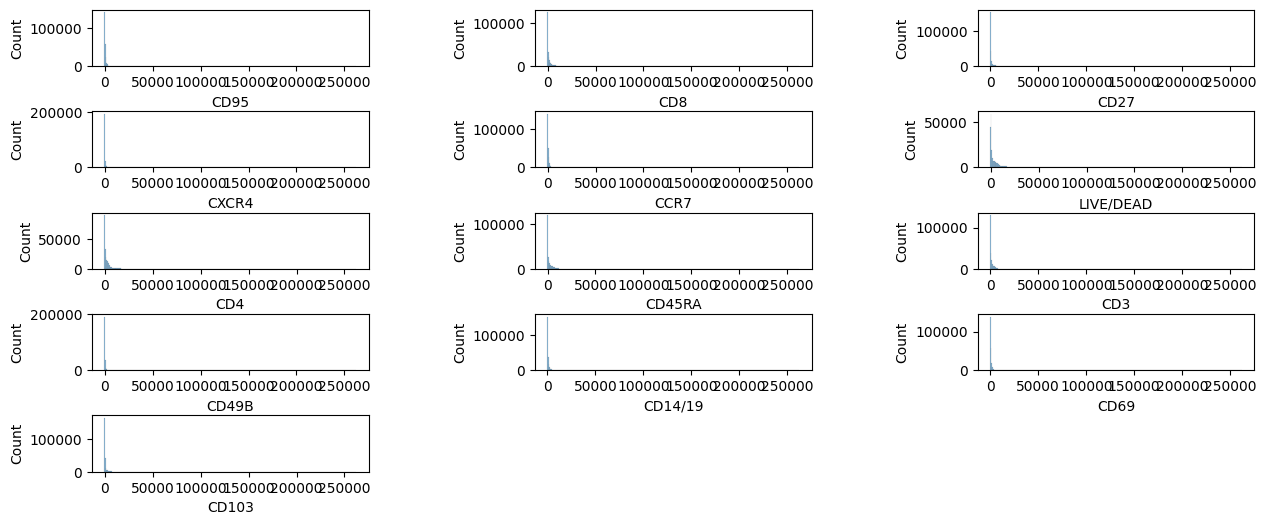

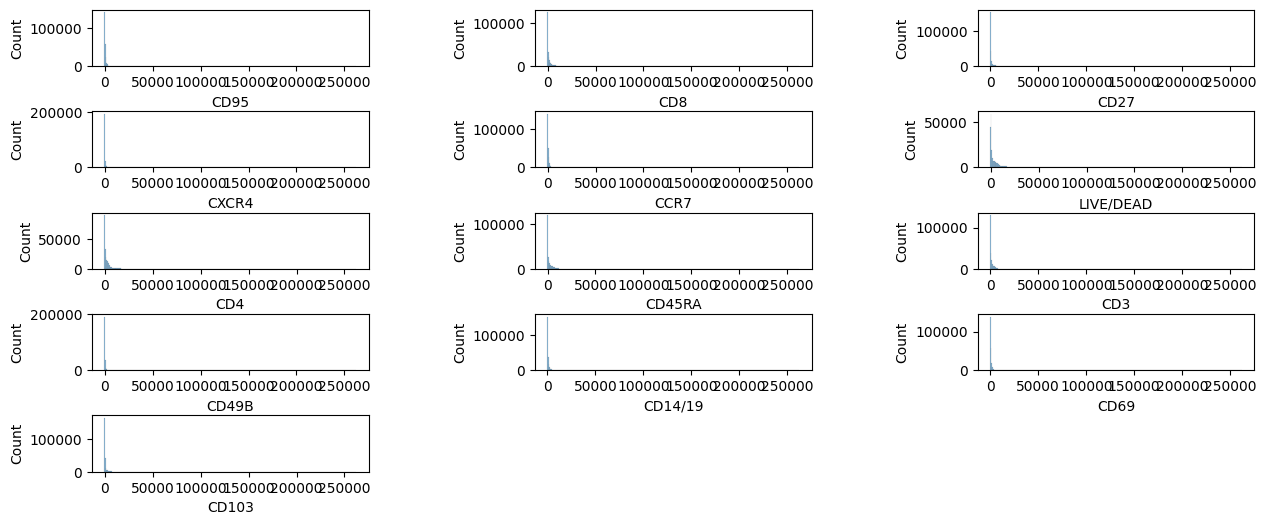

In [6]:
pm.pl.plotdata(adata)

For 2D distribution plots, we use the `scatter_density` function.

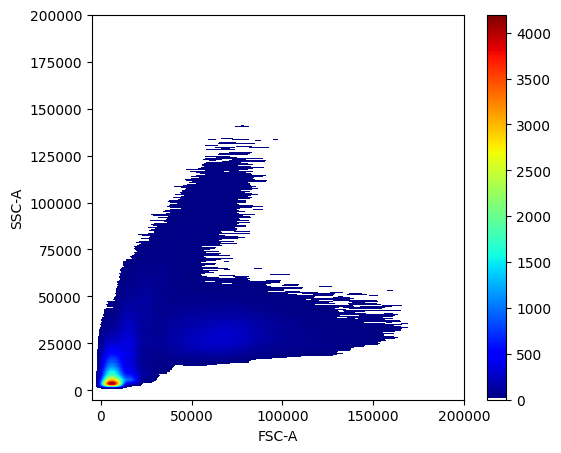

In [15]:
rcParams['figure.figsize'] = (6,5)
pm.pl.scatter_density(adata, x_lim=[-5e3, 2e5], y_lim=[-5e3, 2e5])

Compensate with the compensation matrix that is deposited in the FCS file. The `compensate` function also accepts a custom compensation matrix. 

In [16]:
pm.pp.compensate(adata)

For normalization, `pytometry` provides several different approaches:

In [17]:
adata_arcsinh = pm.tl.normalize_arcsinh(adata, cofactor=150, inplace=False)

In [18]:
adata_biexp = pm.tl.normalize_biExp(adata, inplace=False)

In [19]:
adata_logicle = pm.tl.normalize_logicle(adata, inplace=False)

In [20]:
adata_autologicle = pm.tl.normalize_autologicle(adata, inplace=False)

Save data to `HDF5` file format.

In [ ]:
adata.write("example.h5ad")